In [4]:

from tqdm import tqdm
import NB_classifier as NB
from datasets import load_dataset
from importlib import reload
import features
import evaluation

# Language Identification with Python

For the task of automatic langueage identification I used a multinomial Naive Bayes classifier.
As features a bag-of-words approach with character n-grams $(1<=n<=4)$ was used.

As a dataset I took the universal dependencies corpus from HuggingFace with a predetermined train and test split.

I decided to test the classifier on these 20 languages:

In [5]:
languages = ['ca', 'cs', 'da', 'fr', 'de', 'en', 'es', 'et', 'fi', 'hr', 'hu', 'it', 'lt', 'nl', 'no', 'pt', 'pl', 'ro', 'sv', 'tr']
languages_ud_codes = ['ca_ancora', 'cs_cac', 'da_ddt', 'fr_gsd', 'de_gsd', 'en_ewt', 'es_gsd', 'et_edt', 'fi_tdt', 'hr_set', 'hu_szeged', 'it_isdt', 'lt_alksnis', 'nl_alpino', 'no_bokmaal', 'pt_bosque', 'pl_pdb', 'ro_rrt', 'sv_talbanken', 'tr_boun']

### Download the dataset

In [6]:
datasets = []
for sub_data in languages_ud_codes:
    print(sub_data)
    datasets.append(load_dataset('universal_dependencies', sub_data))

ca_ancora


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/ca_ancora/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 276.48it/s]


cs_cac


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/cs_cac/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 335.61it/s]


da_ddt


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/da_ddt/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 530.14it/s]


fr_gsd


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/fr_gsd/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 424.87it/s]


de_gsd


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/de_gsd/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 452.54it/s]


en_ewt


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/en_ewt/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 485.68it/s]


es_gsd


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/es_gsd/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 412.43it/s]


et_edt


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/et_edt/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 392.11it/s]


fi_tdt


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/fi_tdt/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 494.48it/s]


hr_set


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/hr_set/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 498.33it/s]


hu_szeged


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/hu_szeged/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 588.01it/s]


it_isdt


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/it_isdt/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 460.14it/s]


lt_alksnis


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/lt_alksnis/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 546.35it/s]


nl_alpino


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/nl_alpino/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 448.29it/s]


no_bokmaal


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/no_bokmaal/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 436.51it/s]


pt_bosque


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/pt_bosque/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 501.93it/s]


pl_pdb


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/pl_pdb/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 419.99it/s]


ro_rrt


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/ro_rrt/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 490.68it/s]


sv_talbanken


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/sv_talbanken/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 526.88it/s]


tr_boun


Reusing dataset universal_dependencies (/Users/chrble/.cache/huggingface/datasets/universal_dependencies/tr_boun/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d)
100%|██████████| 3/3 [00:00<00:00, 526.33it/s]


In [7]:
print(len(datasets))

20


### Build training and test sets

In [8]:
train_X_texts, train_y = [],[]
for lang, ds in zip(languages, datasets):
    for i, datapoint in enumerate(ds['train']):
        train_X_texts.append(datapoint['text'])
        train_y.append(lang)
        

In [9]:
test_X_texts, test_y = [],[]
for lang, ds in zip(languages, datasets):
    for datapoint in ds['test']:
        test_X_texts.append(datapoint['text'])
        test_y.append(lang)

In [69]:
print(f'number of training data samples: {len(train_y)}')
print(f'number of test data samples: {len(test_y)}')

number of training data samples: 230272
number of test data samples: 22608


### Finding all ngrams in the training data

In [12]:
ngram_lookup = features.collect_all_n_grams(train_X_texts)

In [70]:
print(f'there are {len(ngram_lookup)} distinct n-grams (1<=n<=4) in the training data')

there are 491274 distinct n-grams (1<=n<=4) in the training data


### Sampling the ngrams

In [14]:
for i, (key,val) in enumerate(ngram_lookup.items()):
    print (key,':', val)
    if i >10:
        break

('i', 'u', 'l', 't') : 0
('O', 'g', ' ', 'b') : 1
('Q', 's', 'p') : 2
('o', ' ', 'C', 'é') : 3
('g', 'e', 'f', 'e') : 4
('L', 'l', 'u', 'b') : 5
('a', 'j', 'ą', ' ') : 6
('n', 'e', 'd', 'e') : 7
(' ', 'b', 'a', 'j') : 8
('u', ' ', 'k', 'ö') : 9
('ä', 'r', 's', 't') : 10
('w', ' ', 'k', 'r') : 11


### Employment of the BOW method on ngrams in the training data

In [15]:
train_X =[]
for text in train_X_texts:
    vector = features.build_feature_vector(text, ngram_lookup)
    train_X.append(vector)

In [72]:
print('size of a feature vector:', train_X[0].size, '(only theoretical not in memory)')

size of a feature vector: 491274 (only theoretical not in memory)


### Training the classifier on the training data

In [18]:
mnb = NB.MNB_classfier()
mnb.train(train_X, train_y)

training classifier for 20 classes with 491274 features.


100%|██████████| 230272/230272 [00:31<00:00, 7396.48it/s] 

training finished!


### Employing BOW on test data counting only the ngrams discovered in training

In [19]:
test_X =[]
for text in test_X_texts:
    vector = features.build_feature_vector(text, ngram_lookup)
    test_X.append(vector)

### Prediction of label for all samples in test data

In [21]:
pred_y = mnb.predict(test_X)

100%|██████████| 22608/22608 [03:18<00:00, 114.16it/s]


#### calculated accuracy

In [22]:
evaluation.accuracy(pred_y, test_y)

0.9575813871196037

#### Comparing against langdetect python library (out of the box no retraining)

In [26]:
from langdetect import detect, LangDetectException
pred_y_langdetect = []
for t in tqdm(test_X_texts):
    try:
        pred_y_langdetect.append(detect(t))
    except LangDetectException:
        pred_y_langdetect.append('unknown')

100%|██████████| 22608/22608 [01:44<00:00, 216.19it/s]


In [27]:
evaluation.accuracy(pred_y_langdetect, test_y)

0.9431617126680821

#### Comparing against langid.py out of the box

In [29]:
import langid
pred_y_langid = [langid.classify(t)[0] for t in tqdm(test_X_texts)]

100%|██████████| 22608/22608 [00:21<00:00, 1062.21it/s]


In [30]:
evaluation.accuracy(pred_y_langid, test_y)

0.9285208775654635

#### Plotting a confusion matrix over all the labels

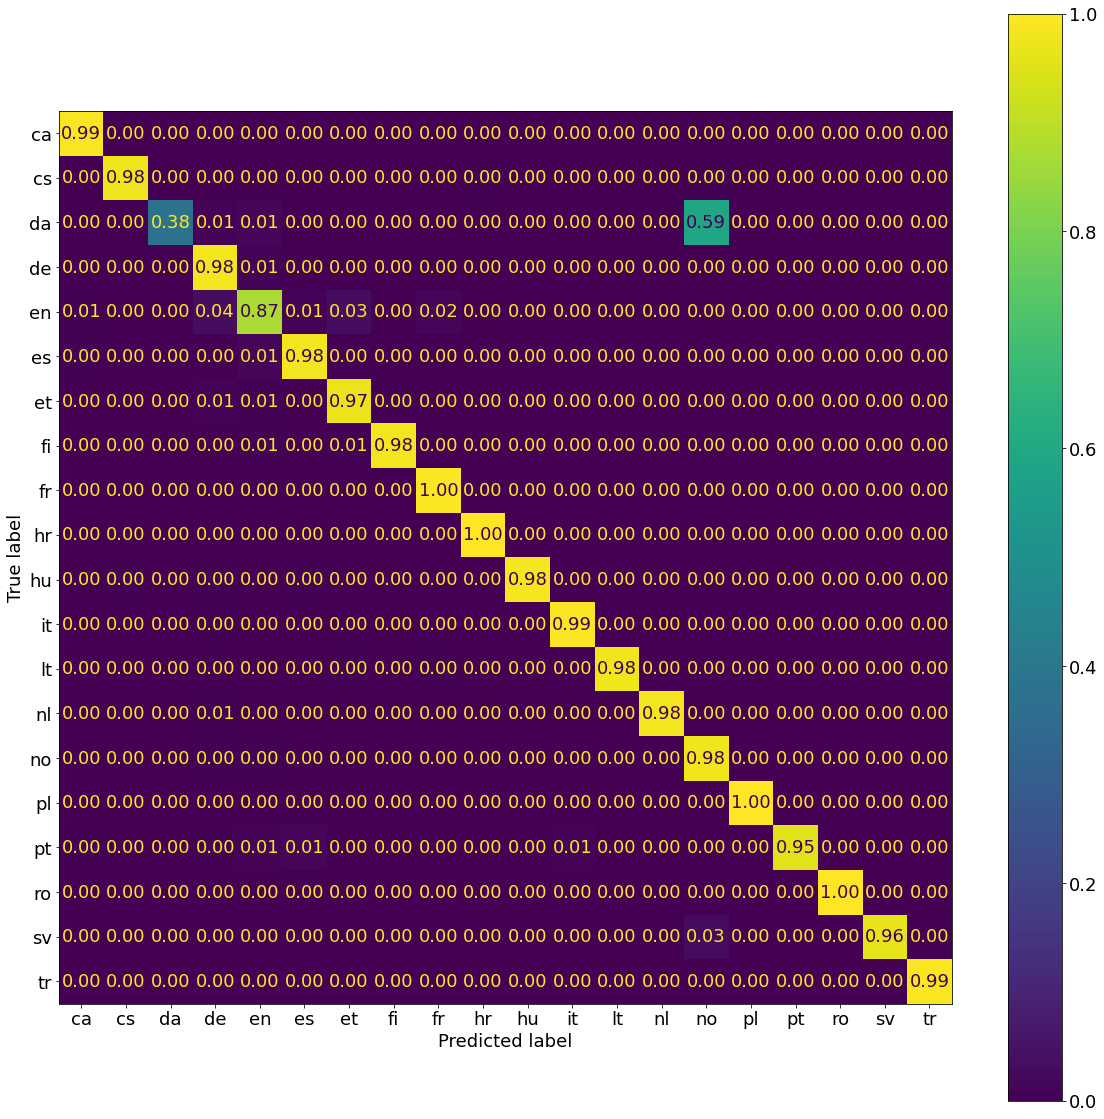

In [68]:
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
matplotlib.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize = (20,20))
disp = ConfusionMatrixDisplay.from_predictions(test_y, pred_y, ax=ax, normalize='true', values_format='.2f')